# Group 17

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [8]:
bank = pd.read_excel('files/Copy of bank.xlsx', index_col=0)

## Introduction of the data:

* The mock data consists of 3 customers' transactions over a two month period. 
* Weekly income of all customers: $400


## Brief snippet of the data:

(Ignore the last column for now, just using it for calculations)

In [9]:
bank.head(10)

,CUST_ID,Date,LOCATION,TRANS_TYPE,TRANS_TYPE_CODE,WITHDRAWL,DEPOSIT,BALANCE,Unnamed: 9
TRANS_ID,,,,,,,,,
1,CID1,2020-05-02,2026.0,Travel,4,20.0,NaN,480,480.0
2,CID1,2020-05-02,2067.0,Healthcare,1,59.0,NaN,421,500.0
3,CID1,2020-05-03,2000.0,Food,2,60.0,NaN,361,NaN
4,CID1,2020-05-03,2120.0,Clothing,3,42.0,NaN,319,NaN
5,CID1,2020-05-03,2113.0,Travel,4,16.0,NaN,303,NaN
6,CID1,2020-05-06,2120.0,Food,2,57.0,NaN,246,NaN
7,CID1,2020-05-07,NaN,Weekly pay,0,NaN,400.0,646,166.0
8,CID1,2020-05-10,2135.0,Utilities,5,38.0,NaN,608,NaN
9,CID1,2020-05-12,2135.0,Food,2,78.0,NaN,530,NaN


## Data description:

1. TRANS_ID: Gives every transaction a unique identifier. (Primary key)
2. CUST_ID: Gives an identifier to each customer. (Foreign key)
3. DATE: Gives the date on which Jon made the transaction. 
4. LOCATION: Gives the postal code of the location where a customer made the transaction.
5. TRANS_TYPE: Categorises each transaction in 6 categories. Categories are:
    * Clothing: Includes the amount spent on clothing and other fashion accessories.
    * Food: Includes the amount spent on food at restaurants.
    * Healthcare: Includes the amount spent on all health related issues. This includes pharmacies and hospitals.
    * Travel: Includes all travel related expenses. This includes the money spent on public transport and petrol stations.
    * Utilities: This includes all miscellaneous expenditure.
    * Weekly pay: This refers to the weekly payment which is deposited to the customer's account.
6. TRANS_TYPE_CODE: Gives a numeric code to the categories in the above column. Codes are:
    * 0: Weekly pay
    * 1: Healthcare
    * 2: Food
    * 3: Clothing
    * 4: Travel
    * 5: Utilities
7. WITHDRAWL: Gives the amount of money withdrawn from the customer's account.
8. DEPOSIT: Gives the amount of money deposited into the customer's account..
9. BALANCE: Gives the total amount of money in the customer's account after each transaction.

## Splitting the data into a training and a testing set. 

In [10]:
train, test = train_test_split(bank, test_size = 0.5)
print(train.shape)
print(test.shape)

(100, 9)
(100, 9)


In [11]:
bank.describe()

,LOCATION,TRANS_TYPE_CODE,WITHDRAWL,DEPOSIT,BALANCE,Unnamed: 9
count,168.000000,200.000000,168.000000,32.0,200.000000,12.000000
mean,2088.553571,2.480000,52.315476,400.0,918.950000,354.500000
std,53.960593,1.671397,29.129926,0.0,484.328253,283.845829
min,2000.000000,0.000000,1.000000,400.0,36.000000,19.000000
25%,2062.000000,1.000000,29.000000,400.0,512.750000,158.750000
50%,2088.000000,2.000000,52.000000,400.0,857.000000,294.500000
75%,2123.500000,4.000000,77.000000,400.0,1264.500000,500.000000
max,2200.000000,5.000000,127.000000,400.0,2122.000000,1000.000000


In [32]:
print(bank[['CUST_ID', 'BALANCE']])


         CUST_ID  BALANCE
TRANS_ID                 
1           CID1      480
2           CID1      421
3           CID1      361
4           CID1      319
5           CID1      303
...          ...      ...
196         CID4     1249
197         CID4     1205
198         CID4     1605
199         CID4     1545
200         CID4     1505

[200 rows x 2 columns]


### **Aim:** 
> To calculate the projected expenditure of the user based on the data collected.

### **Hypothesis:**
> Using average expenditure per transaction type, we can calculate the projections for next week using "Projected Income - Projected Expenses"

### **Method:**

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

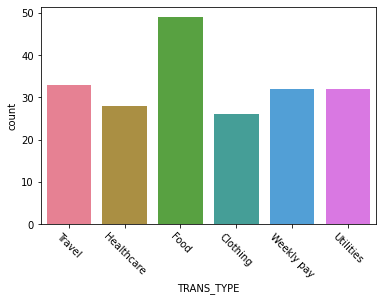

In [15]:
sns.countplot(x='TRANS_TYPE', data=bank, palette='husl')
# Will try to get rid of "Weekly pay", the code below doesn't seem to work.
# stats_df = df.drop(['Weekly pay'], axis=1)
# sns.countplot(data=stats_df)
plt.xticks(rotation=-45)

* Most of CID1's expenditure is focussed on **Food** with **Travel** next. 
* **Utilities** is third in line, this could be interpreted as the expenditure on public transport and/or for the fuel in his car.
* An equal amount of expenditure on **Healthcare** and **Clothing** is observed.

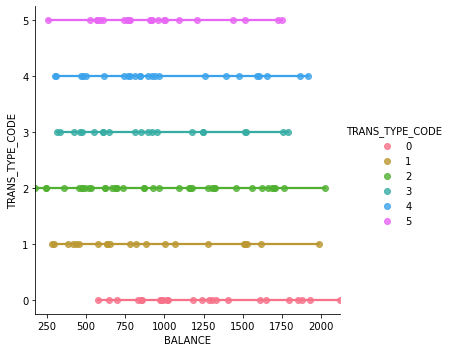

In [5]:
sns.lmplot(x='BALANCE',y='TRANS_TYPE_CODE', data=df,
           fit_reg=True, hue="TRANS_TYPE_CODE", palette='husl') 

We can see that Jon is saving up his money weekly as the **Balance** of his bank account is going futher after each of his **Weekly pay** and his ahead of any expenditure done by him.

## Projections for upcoming week:

**Assumptions:**
* The starting balance amount in Customer 1's account before his first weekly pay is $500.

* The starting balance amount in Customer 2's account before his first weekly pay is $1000.

* The starting balance amount in Customer 3's account before his first weekly pay is $400.

* (More assumptions to come)

Table highlighting the **Balance** in Customer 1's account after his weekly pay and before any of his expenditures:

TRANS_ID | DEPOSIT | BALANCE
---------------- | ------------------- | -----------
1 | 400 | 550
7 | 400 | 716
13 | 400 |905
21 | 400 | 924
26 | 400 | 1061
33 | 400 | 1203
39 | 400 | 1386
46 | 400 | 1446

Average expenditure per week : (Difference in Balance)/8
(Calculations done in excel)

Average expenditure per week: $130.75

Projected income for next week: $400

Projected expenditure for next week: $130.75

Balance in the account per last week's pay: $1446

Balance in the account for the projected week: (1446 - 130.75) + 400 = $1715.25

Savings for the projected week: 1715.25 - 1446 = $269.25